In [25]:
from sklearn import datasets
iris=datasets.load_iris()

In [2]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [4]:
print(iris.data[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [5]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
type(iris.data),type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [8]:
#creating a dataframe for given numpy arrays
import numpy as np
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
#separating the features and labels
x=data[['sepal length','sepal width','petal length','petal width']] #features
y=data['species'] #labels

In [11]:
#import train_test_split
from sklearn.model_selection import train_test_split

#split dataset into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3) #70% training set and 30% test set

In [13]:
#import random forest model
from sklearn.ensemble import RandomForestClassifier

#create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#train the model using traning sets y_pred=clf.predict(x_test)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [14]:
#import scikit learn metrics module for performance metrics
from sklearn import metrics
#building a confusion matrix
metrics.confusion_matrix(y_test,y_pred)

array([[21,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 10]], dtype=int64)

In [15]:
#getting accuracy score
metrics.accuracy_score(y_test,y_pred)

1.0

In [16]:
#making predictions for single item
clf.predict([[3,4,5,6]])

array([2])

In [17]:
#making predictions for single item
clf.predict([[1,1,2,1]])

array([1])

In [18]:
#finding important features
feature_imp=pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.425396
petal length (cm)    0.419568
sepal length (cm)    0.122667
sepal width (cm)     0.032369
dtype: float64

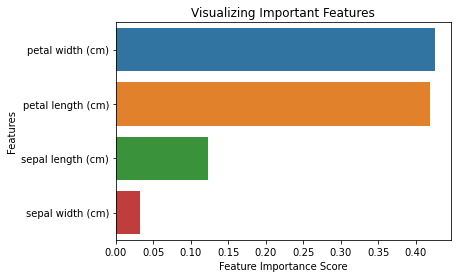

In [20]:
#visualizing feature importances
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#creating a bar plot
sns.barplot(x=feature_imp,y=feature_imp.index)
#add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

In [21]:
#generating model on selected imp features
#import train_test_split
x=data[['petal length','petal width']] #feature sepal length and sepal width removed
y=data['species'] #labels
#import train_test_split
from sklearn.model_selection import train_test_split

#split dataset into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.70,random_state=5) 

In [22]:
#import random forest model
from sklearn.ensemble import RandomForestClassifier

#create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#train the model using traning sets y_pred=clf.predict(x_test)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [23]:
metrics.confusion_matrix(y_test,y_pred)

array([[34,  0,  0],
       [ 0, 37,  2],
       [ 0,  3, 29]], dtype=int64)

In [24]:
#model accuracy; how often is the classifier correct?
metrics.accuracy_score(y_test,y_pred)

0.9523809523809523